In [ ]:
from typing import List
from typing import Tuple
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from tqdm import tqdm

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/JL6270/US_Fire_2014/main/us_fire_2014.csv")
data

<ipython-input-12-0fc1f8ae9556>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/JL6270/US_Fire_2014/main/us_fire_2014.csv")


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1721941,300000001,FS-1524899,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,117,Nezperce National Forest,...,A,45.340833,-116.466667,5,USFS,ID,Idaho,49.0,Idaho,NaN
1,1721942,300000002,FS-1524894,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,117,Nezperce National Forest,...,A,45.505278,-116.425556,5,USFS,ID,Idaho,49.0,Idaho,NaN
2,1721943,300000003,FS-1524891,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,117,Nezperce National Forest,...,A,45.908056,-115.767778,5,USFS,ID,Idaho,49.0,Idaho,NaN
3,1721944,300000004,FS-1524900,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,117,Nezperce National Forest,...,A,45.840000,-115.966389,5,USFS,ID,Idaho,49.0,Idaho,NaN
4,1721945,300000005,FS-1522737,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,117,Nezperce National Forest,...,A,45.598333,-115.449167,5,USFS,ID,Idaho,49.0,Idaho,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67748,1880406,300348061,2014CAIRS25660006,NONFED,ST-CACDF,ST/C&L,USCANEU,Nevada-Yuba-Placer Unit,CANEU,Nevada-Yuba-Placer Unit,...,A,39.073245,-121.026433,14,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN,NaN
67749,1880407,300348068,2014CAIRS25183134,NONFED,ST-CACDF,ST/C&L,USCATUU,Tulare Unit,CATUU,Tulare Unit,...,B,36.453980,-118.877998,13,STATE OR PRIVATE,CA,NaN,NaN,NaN,NaN
67750,1880408,300348069,2014CAIRS24314436,NONFED,ST-CACDF,ST/C&L,USCAAEU,Amador-El Dorado Unit,CAAEU,Amador-El Dorado Unit,...,A,38.277227,-120.974637,14,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN,NaN
67751,1880416,300348122,2014CAIRS24038919,NONFED,ST-CACDF,ST/C&L,USCAAEU,Amador-El Dorado Unit,CAAEU,Amador-El Dorado Unit,...,B,38.338223,-120.717679,14,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN,NaN


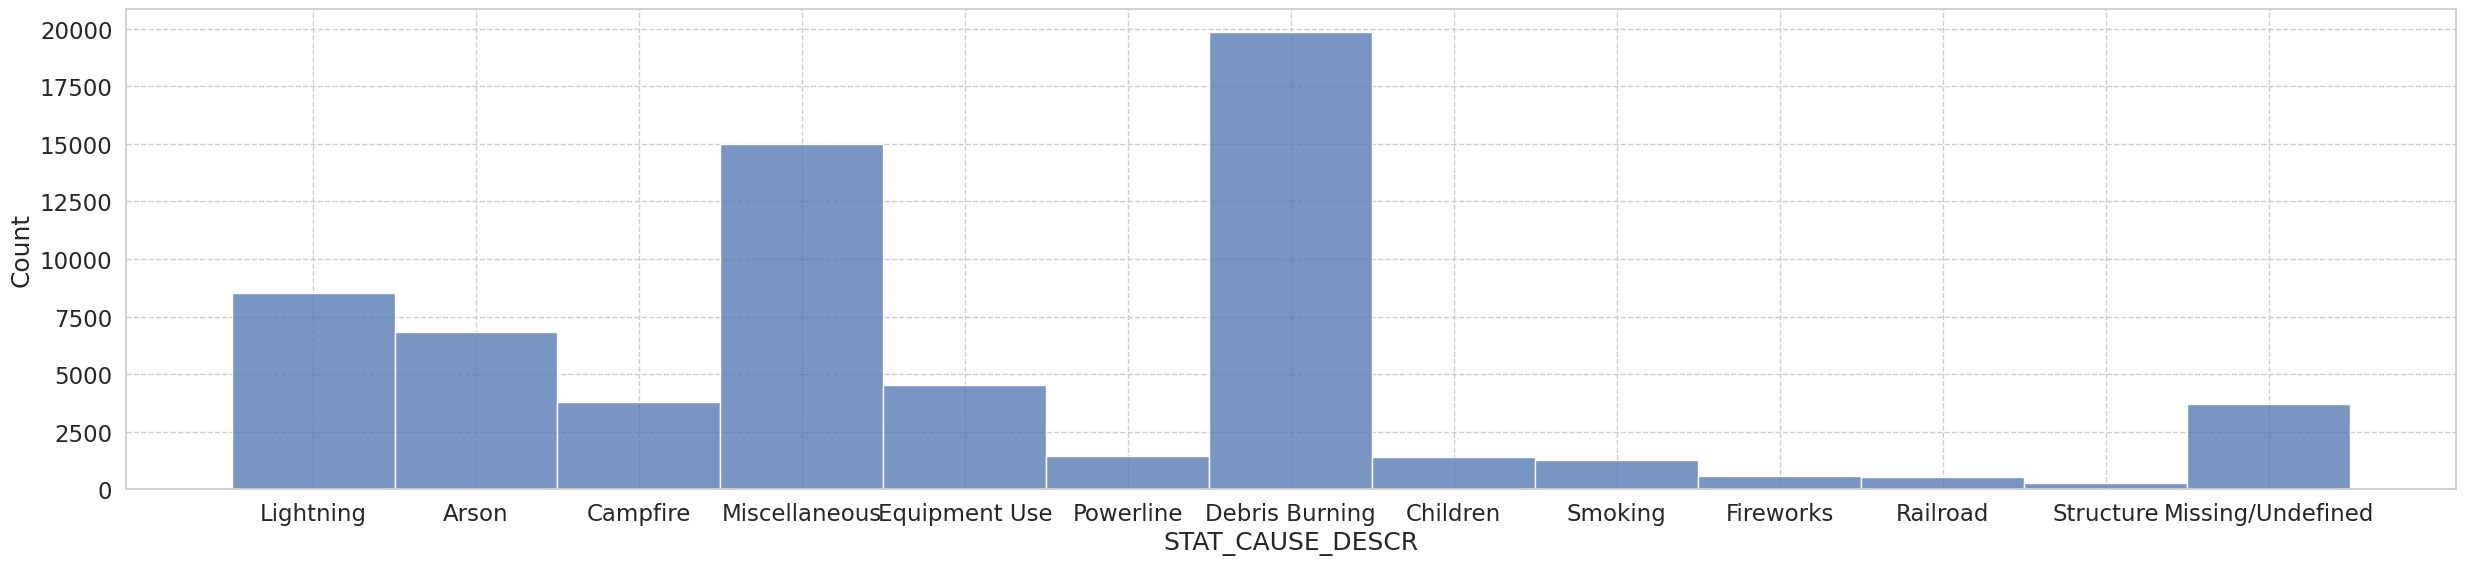

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Set the size of the figure
plt.figure(figsize=(25, 6))

# Create the histogram plot
sns.histplot(x="STAT_CAUSE_DESCR", data=data)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-14-686670883a27>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

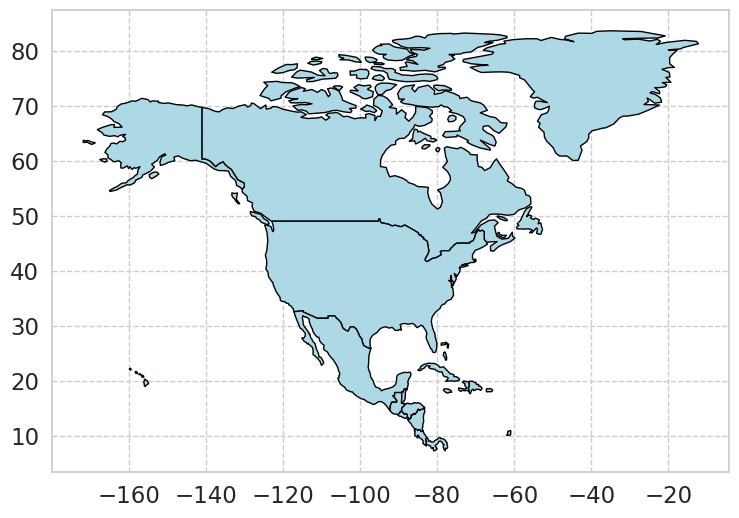

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the shapefile of US states
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa['continent'] == 'North America'][['name', 'geometry']]

# Filter out non-mainland states for simplicity (Alaska, Hawaii, etc.)
usa_mainland = usa[(usa['name'] != 'Alaska') & (usa['name'] != 'Hawaii')]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
usa_mainland.plot(ax=ax, color='lightblue', edgecolor='black')

<ipython-input-15-062db12e0e64>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


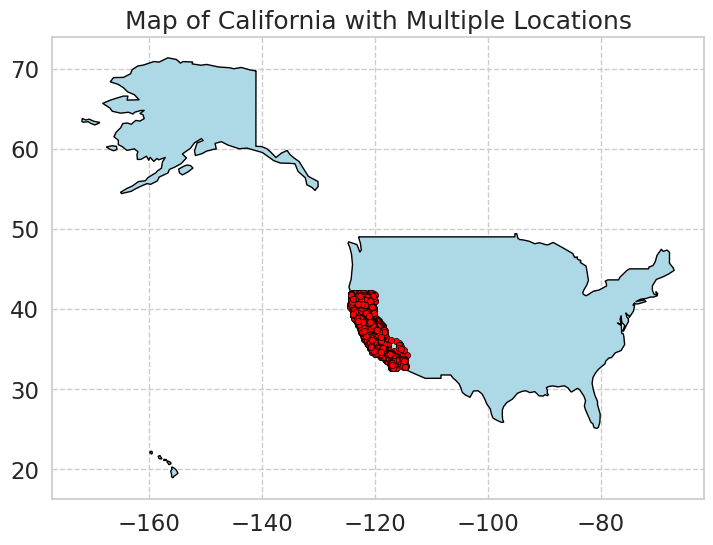

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of US states
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for California
california = usa[usa['name'] == 'United States of America']

# Assuming 'STATE' is the column name for the state information in your DataFrame
california_data = data[data['STATE'] == 'CA']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the California state map
california.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the data points within California
for index, row in california_data.iterrows():
    plt.scatter(row['LONGITUDE'], row['LATITUDE'], s=20, edgecolors='black', linewidths=0.5, color='red')

ax.set_title('Map of California with Multiple Locations')
plt.show()


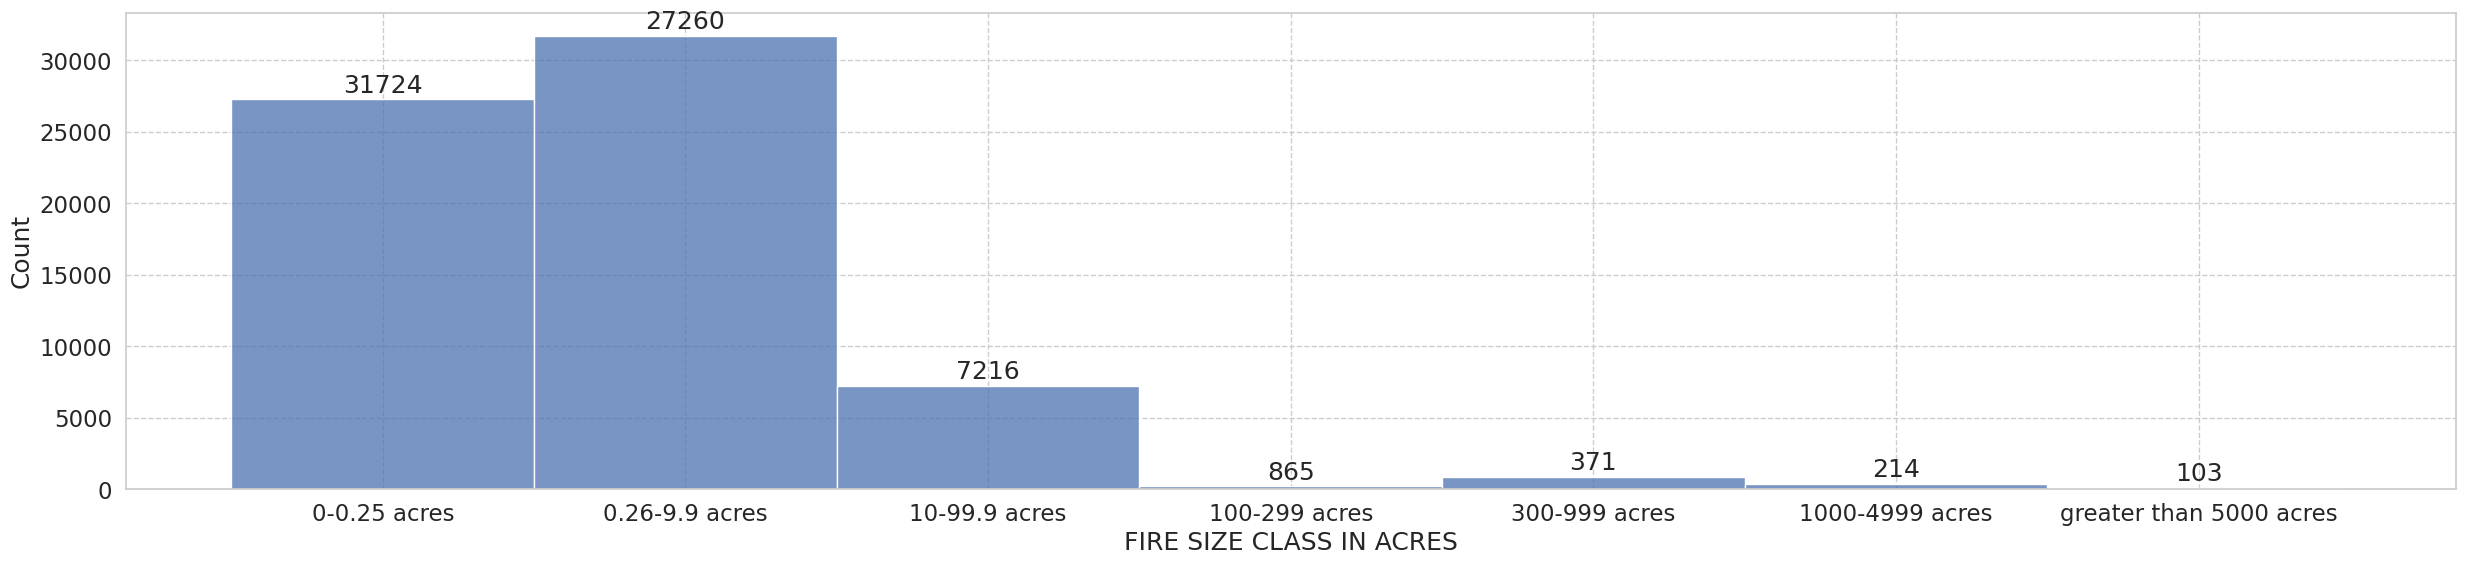

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(25, 6))

# Define the FIRE_SIZE_CLASS categories and corresponding size ranges
fire_size_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
size_ranges = {
    'A': '0-0.25 acres',
    'B': '0.26-9.9 acres',
    'C': '10-99.9 acres',
    'D': '100-299 acres',
    'E': '300-999 acres',
    'F': '1000-4999 acres',
    'G': 'greater than 5000 acres'
}

# Create the histogram plot with custom x-axis labels
ax = sns.histplot(x="FIRE_SIZE_CLASS", data=data, bins=len(fire_size_classes), discrete=True)

# Add counts above each bar
for p, label in zip(ax.patches, data['FIRE_SIZE_CLASS'].value_counts()):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set custom x-axis labels
ax.set_xticks(range(len(fire_size_classes)))
ax.set_xticklabels([size_ranges[cls] for cls in fire_size_classes])

# Set x-axis label
ax.set_xlabel("FIRE SIZE CLASS IN ACRES")

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()
